In [1]:
import ipywidgets as ui
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.float_format', lambda x: format(x, '0,.4f'))

In [3]:
# Load data 
df = pd.read_csv('data/MergedData-v3.csv')
df

,Model,Scenario,Region,Indicator,Sector,Unit,Year,Value
0,AIM,SSP2_NoMt_NoCC,CAN,POPT,TOT,million,2005,32.2834
1,AIM,SSP2_NoMt_NoCC,CAN,POPT,TOT,million,2010,34.0166
2,AIM,SSP2_NoMt_NoCC,CAN,POPT,TOT,million,2020,37.7642
3,AIM,SSP2_NoMt_NoCC,CAN,POPT,TOT,million,2030,41.3836
4,AIM,SSP2_NoMt_NoCC,CAN,POPT,TOT,million,2040,44.5403
...,...,...,...,...,...,...,...,...
6985900,GCAM,SSP2_NoMt_NoCC_FlexA_LAM,WLD,EN2O,AGR,MtCO2e,2010,"2,136.4287"
6985901,GCAM,SSP2_NoMt_NoCC_FlexA_LAM,WLD,EN2O,AGR,MtCO2e,2020,"2,050.2618"
6985902,GCAM,SSP2_NoMt_NoCC_FlexA_LAM,WLD,EN2O,AGR,MtCO2e,2030,"2,106.5664"
6985903,GCAM,SSP2_NoMt_NoCC_FlexA_LAM,WLD,EN2O,AGR,MtCO2e,2040,"2,096.4558"


In [58]:
# Filter (select)
qstr = "Model == ['AIM', 'CAPRI', 'GCAM', 'GLOBIOM', 'IMPACT', 'MAgPIE'] & "
qstr += "Scenario == ['SSP2_NoMt_NoCC'] & "
qstr += "Region == ['WLD'] & " 
qstr += "Indicator == ['PROD'] & "
qstr += "Sector == ['CRP'] & "
qstr += "Year == [2000, 2005, 2010, 2020, 2030, 2040, 2050]"
results = df.query(qstr)
results

,Model,Scenario,Region,Indicator,Sector,Unit,Year,Value
73653,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2005,"3,254,778.3000"
73654,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2010,"3,499,849.1000"
73655,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2020,"3,985,703.9000"
73656,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2030,"4,422,615.5000"
73657,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2040,"4,767,075.9000"
73658,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2050,"5,048,608.3000"
1306544,GLOBIOM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2000,"4,330,777.7000"
1306545,GLOBIOM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2010,"5,341,058.1000"
1306546,GLOBIOM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2020,"6,383,136.0000"
1306547,GLOBIOM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2030,"7,447,246.9000"


In [59]:
# Pivot
results_processed = results.pivot_table(index='Year', columns='Model', values='Value', aggfunc='sum')
results_processed

Model,AIM,CAPRI,GCAM,GLOBIOM,IMPACT,MAgPIE
Year,,,,,,
2000,nan,nan,nan,"4,330,777.7000",nan,"3,087,923.8000"
2005,"3,254,778.3000",nan,nan,nan,"7,077,376.0000","3,425,009.7000"
2010,"3,499,849.1000","8,547,348.2000","7,851,728.2000","5,341,058.1000","7,691,789.5000","3,860,696.3000"
2020,"3,985,703.9000",nan,"8,863,349.1000","6,383,136.0000","9,261,967.0000","4,971,443.6000"
2030,"4,422,615.5000","10,848,524.9000","9,679,980.3000","7,447,246.9000","10,824,316.0000","5,881,517.2000"
2040,"4,767,075.9000",nan,"10,436,799.0000","8,358,156.0000","12,076,974.0000","6,627,328.2000"
2050,"5,048,608.3000","14,412,032.6000","11,204,572.0000","9,146,593.8000","13,243,246.0000","7,220,422.3000"


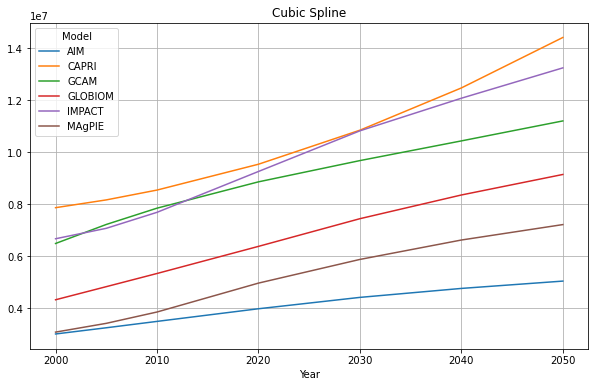

In [60]:
# Interpolate
results_processed.interpolate(method='cubicspline',limit_direction='both',inplace=True)
results_processed

# Plot
fig, ax = plt.subplots();
results_processed.plot(ax=ax,kind='line',grid=True,title='Cubic Spline',figsize=(10,6)); 
plt.show()

Model,AIM,CAPRI,GCAM,GLOBIOM,IMPACT,MAgPIE
Year,,,,,,
2000,"3,016,366.7169","7,870,133.9750","6,493,837.8000","4,330,777.7000","6,676,234.3099","3,087,923.8000"
2005,"3,254,778.3000","8,169,293.2438","7,225,521.6750","4,834,948.9583","7,077,376.0000","3,425,009.7000"
2010,"3,499,849.1000","8,547,348.2000","7,851,728.2000","5,341,058.1000","7,691,789.5000","3,860,696.3000"
2020,"3,985,703.9000","9,540,145.1750","8,863,349.1000","6,383,136.0000","9,261,967.0000","4,971,443.6000"
2030,"4,422,615.5000","10,848,524.9000","9,679,980.3000","7,447,246.9000","10,824,316.0000","5,881,517.2000"
2040,"4,767,075.9000","12,472,487.3750","10,436,799.0000","8,358,156.0000","12,076,974.0000","6,627,328.2000"
2050,"5,048,608.3000","14,412,032.6000","11,204,572.0000","9,146,593.8000","13,243,246.0000","7,220,422.3000"


,AIM,CAPRI,GCAM,GLOBIOM,IMPACT,MAgPIE
Year,,,,,,
2000,0.8619,0.9208,0.8271,0.8108,0.8680,0.7998
2005,0.9300,0.9558,0.9202,0.9052,0.9201,0.8871
2010,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2020,1.1388,1.1162,1.1288,1.1951,1.2041,1.2877
2030,1.2637,1.2692,1.2328,1.3943,1.4073,1.5234
2040,1.3621,1.4592,1.3292,1.5649,1.5701,1.7166
2050,1.4425,1.6861,1.4270,1.7125,1.7217,1.8702


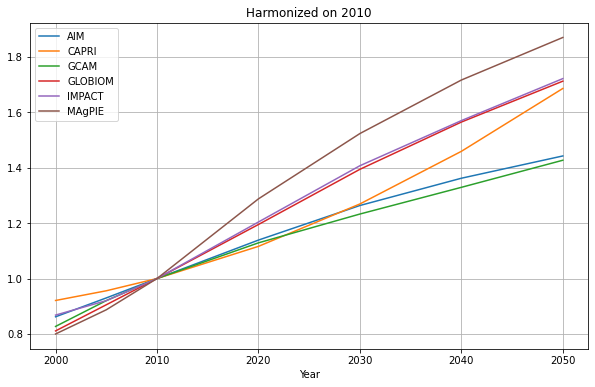

In [61]:
# Harmonize to row

base_row = 2010

results_mults = pd.DataFrame()

for col in results_processed.columns.values:
    base = results_processed[col][base_row]
    results_mults[col] = results_processed[col].apply(func=lambda x: x / base)
    
display(results_processed)    
display(results_mults)

# Plot 
fig, ax = plt.subplots();
results_mults.plot(ax=ax,kind='line',grid=True,title='Harmonized on '+str(base_row),figsize=(10,6)); 
plt.show()

Model,AIM,CAPRI,GCAM,GLOBIOM,IMPACT,MAgPIE
Year,,,,,,
2000,"3,016,366.7169","7,870,133.9750","6,493,837.8000","4,330,777.7000","6,676,234.3099","3,087,923.8000"
2005,"3,254,778.3000","8,169,293.2438","7,225,521.6750","4,834,948.9583","7,077,376.0000","3,425,009.7000"
2010,"3,499,849.1000","8,547,348.2000","7,851,728.2000","5,341,058.1000","7,691,789.5000","3,860,696.3000"
2020,"3,985,703.9000","9,540,145.1750","8,863,349.1000","6,383,136.0000","9,261,967.0000","4,971,443.6000"
2030,"4,422,615.5000","10,848,524.9000","9,679,980.3000","7,447,246.9000","10,824,316.0000","5,881,517.2000"
2040,"4,767,075.9000","12,472,487.3750","10,436,799.0000","8,358,156.0000","12,076,974.0000","6,627,328.2000"
2050,"5,048,608.3000","14,412,032.6000","11,204,572.0000","9,146,593.8000","13,243,246.0000","7,220,422.3000"


Model,AIM,CAPRI,GCAM,GLOBIOM,IMPACT,MAgPIE
Year,,,,,,
2000,"6,629,216.6257","7,082,361.9743","6,361,559.1539","6,236,859.7787","6,676,234.3099","6,152,169.9756"
2005,"7,153,185.4196","7,351,576.4801","7,078,338.7219","6,962,929.2426","7,077,376.0000","6,823,757.0637"
2010,"7,691,789.5000","7,691,789.5000","7,691,789.5000","7,691,789.5000","7,691,789.5000","7,691,789.5000"
2020,"8,759,576.3509","8,585,211.0817","8,682,803.8115","9,192,511.5853","9,261,967.0000","9,904,767.0966"
2030,"9,719,798.3380","9,762,626.7193","9,482,800.3384","10,724,963.9373","10,824,316.0000","11,717,936.0218"
2040,"10,476,835.8022","11,224,036.4128","10,224,202.7382","12,036,786.5986","12,076,974.0000","13,203,839.2820"
2050,"11,095,573.3239","12,969,440.1623","10,976,336.3003","13,172,235.3201","13,243,246.0000","14,385,479.7469"


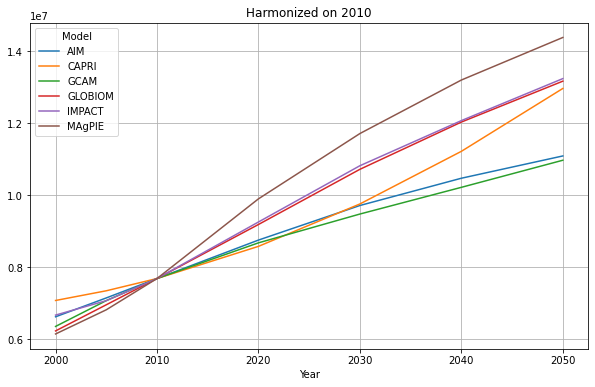

In [62]:
# Harmonize to column

base_col = 'IMPACT'

results_harm = pd.DataFrame().reindex_like(results_processed)

for col in results_processed.columns.values:
    for row in results_processed.index.values:
        mult = results_mults[col][row]
        results_harm[col][row] = results_processed[base_col][base_row] * mult
    
display(results_processed)    
display(results_harm)

# Plot 
fig, ax = plt.subplots();
results_harm.plot(ax=ax,kind='line',grid=True,title='Harmonized on '+str(base_row),figsize=(10,6)); 
plt.show()

In [39]:
%matplotlib widget

import ipywidgets as ui
from matplotlib import pyplot as plt

outp = ui.Output()
display(outp)

with outp:
    fig, ax = plt.subplots(num='num')
    plt.subplots_adjust(top=.98)
    plt.grid()
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_xlabel('xlable')
    ax.set_ylabel('ylabel')
    plt.show()

Output()

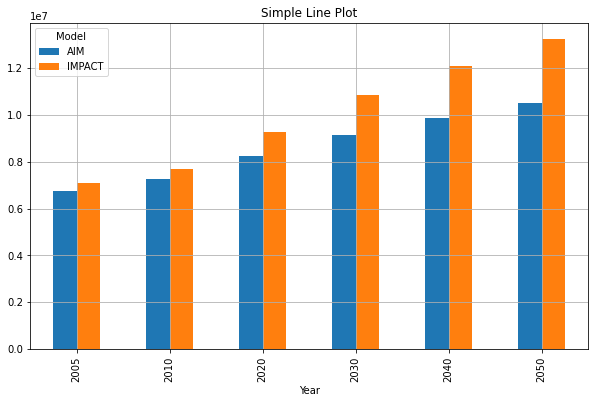

,Model,Scenario,Region,Indicator,Sector,Unit,Year,Value
29705,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2005,"6,768,829.8000"
29706,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2010,"7,258,283.5000"
29707,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2020,"8,224,068.2000"
29708,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2030,"9,119,085.4000"
29709,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2040,"9,878,012.5000"
29710,AIM,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2050,"10,518,761.0000"
4634379,IMPACT,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2005,"7,077,376.0000"
4634380,IMPACT,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2010,"7,691,789.5000"
4634381,IMPACT,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2020,"9,261,967.0000"
4634382,IMPACT,SSP2_NoMt_NoCC,WLD,PROD,CRP,1000 t,2030,"10,824,316.0000"


In [27]:
# === ALTERNATE QUERY AND PLOT ===

# Filter (select)
qstr = "Model == ['AIM', 'IMPACT'] & "
qstr += "Scenario == ['SSP2_NoMt_NoCC'] & "
qstr += "Region == ['WLD'] & " 
qstr += "Indicator == ['PROD'] & "
qstr += "Sector == ['CRP'] & "
qstr += "Year == [2000, 2005, 2010, 2020, 2030, 2040, 2050]"
results = df.query(qstr)

# Plot
fig, ax = plt.subplots();
results_processed =results.pivot_table(index='Year',columns='Model',values='Value')
results_processed.plot(ax=ax,kind='bar',grid=True,title='Simple Line Plot',figsize=(10,6)); 
plt.show()
display(results)